Question: 5

Importing all libraries here

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

(a) Create a random number generator and use its normal() method
to generate a predictor X of length n = 100, as well as a noise
vector ϵ of length n = 100.

In [21]:
n = 100

rng = np.random.default_rng()

X = rng.normal(loc=0.0, scale=1.0, size=n)
epsilon = rng.normal(loc=0.0, scale=1.0, size=n)

print("Predictor X:", X)
print("Noise vector: ", epsilon)


Predictor X: [-2.1152774  -0.96872034  0.33221841  0.0107884   1.55890675 -0.30692119
  0.0574967  -0.82784077 -0.43957679  0.22170317  0.16564021  1.12265924
  0.61326569  0.72959364  0.73158243  1.19646381  1.28059167 -0.14549813
 -1.94484107 -1.00939904 -0.39227968 -0.41798572 -2.08080727 -2.54022164
 -0.8305938  -1.12211206  1.24172558  0.34834778 -1.69959494 -0.48304076
 -0.01287129 -1.1700692  -0.48236281 -1.70635231  1.96903211 -0.41886403
  0.85005718 -0.44469596  1.13589745 -1.18579334  1.52234064 -0.15802053
 -0.78182373 -0.05869503  0.03305076 -0.42856219  0.06024159 -2.39635224
 -0.52565909  2.04280873  0.51558673  0.99271704 -0.61864106  0.21742185
  0.29748335  0.05303982  1.04584384  0.06325125  0.55104966  1.75799919
  0.49006063  0.95592854 -1.53948735 -0.06940384 -0.60328596  1.09172465
  1.17541233  1.45254036 -1.90843098 -0.21281634 -0.50445401 -0.10492038
 -0.21354867  1.14132438 -2.2803304  -1.13045844 -0.32300666 -0.73322408
 -0.96329946 -0.25466064  0.16643012 -

(b) Generate a response vector Y of length n = 100 according to
the model.

Beta values setting I done by myself. it can be anything.

In [22]:
beta_0 = 1.1
beta_1 = -1.0
beta_2 = 1.9
beta_3 = 0.5

Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon

# output vector Y
print("Y:", Y)


Y: [ 7.38682244  4.19084056  1.11889622  1.7428237   5.42208058  0.16811003
  1.04577163  2.25668942  3.37071431  2.47655789 -0.97707608  2.12531577
  2.13447107  0.72946701  3.06265814  2.81142231  3.23914624  1.28244099
  5.64374636  3.48521155  0.55546818  1.31906889  6.62039306  4.72177716
  3.09972554  2.6588962   3.36736227  0.59735399  7.35613171  2.01302006
  0.27084597  3.64129581  1.97324249  6.29877767  9.18380107  1.16777988
  0.91847238  2.60380179  3.41121922  4.11301908  7.88540971  1.86323633
  4.27216669  1.63433998  1.77969481  2.67237925  1.17454847  6.09816064
  3.24199411 12.24449024  0.91606423  1.1484765   3.02671175  2.54590345
 -0.99969488  1.715889    2.8688613  -1.58542043  2.0442411   8.37767021
 -0.36967461  3.11742036  5.63089353  0.33786059  1.96900936  2.9310928
  2.38714409  5.37340952  8.61756276  2.45809876  2.19172     1.80331571
  1.42381228  4.58346912  7.48290431  4.26568679  2.4226243   4.87702114
  4.46373117  2.28348462  1.7111882   2.01528408 

(c) forward stepwise selection

finding lowest cp to prevent model from overfittting.

In [23]:

X_poly = np.column_stack([X**i for i in range(1, 11)])

X_cnst = sm.add_constant(X_poly)

# forward stepwise variables
n = len(Y)
best_model = None
rf_predictors = list(range(X_cnst.shape[1]))
selcf_predictors = []


def cp_func(model, X, Y):
    n = len(Y)
    mse = np.mean((Y - model.predict(X))**2)
    p = X.shape[1]
    return mse + 2 * p * (np.mean(Y**2) - mse)

# Forward stepwise selection
while rf_predictors:
    cp_val = []

    for predictor in rf_predictors:
        pred_test = selcf_predictors + [predictor]
        X_test = X_cnst[:, pred_test]
        model = sm.OLS(Y, X_test).fit()
        cp = cp_func(model, X_test, Y)
        cp_val.append((cp, predictor, model))

    # find model with lowest cp
    best_cp, best_predictor, best_model = min(cp_val, key=lambda x: x[0])
    selcf_predictors.append(best_predictor)
    rf_predictors.remove(best_predictor)

final_forward = sm.OLS(Y, X_cnst[:, selcf_predictors]).fit()

print("Forward Selection of predictors in squence:", selcf_predictors)
print("Coefficients of forward model:", final_forward.params)


Forward Selection of predictors in squence: [3, 9, 5, 7, 1, 10, 8, 6, 4, 2, 0]
Coefficients of forward model: [-0.16075263  0.01911758  0.65457059 -0.20037684 -1.04396716  0.01566562
 -0.21553966  1.01497305 -1.92144612  3.22937936  1.09961437]


(d) Backward stepwise selection

In [24]:

selcB_predictors = list(range(X_cnst.shape[1]))

# Backward stepwise selection
while len(selcB_predictors) > 1:
    cp_val = []

    for predictor in selcB_predictors[1:]:
        pred_test = [p for p in selcB_predictors if p != predictor]
        X_test = X_cnst[:, pred_test]
        model = sm.OLS(Y, X_test).fit()
        cp = cp_func(model, X_test, Y)
        cp_val.append((cp, predictor, model))

    # find model with lowest cp
    best_cp, pred_remove, best_model = min(cp_val, key=lambda x: x[0])
    selcB_predictors.remove(pred_remove)

final_backward = sm.OLS(Y, X_cnst[:, selcB_predictors]).fit()

print("Backward selection of predictors in squence removal:", selcB_predictors)
print("coefficients of backward model:", final_backward.params)


Backward selection of predictors in squence removal: [0]
coefficients of backward model: [3.15355276]


Results Comparision

In [25]:
print("\nFinal Results:")
print("\n")
print("Forward selection selected predictors:", selcf_predictors)
print("Forward selection model coefficients:", final_forward.params)
print("\nBackward selection selected predictors:", selcB_predictors)
print("Backward selection model coefficients:", final_backward.params)



Final Results:


Forward selection selected predictors: [3, 9, 5, 7, 1, 10, 8, 6, 4, 2, 0]
Forward selection model coefficients: [-0.16075263  0.01911758  0.65457059 -0.20037684 -1.04396716  0.01566562
 -0.21553966  1.01497305 -1.92144612  3.22937936  1.09961437]

Backward selection selected predictors: [0]
Backward selection model coefficients: [3.15355276]


(f) Generate response vector Y and performing forward stepwise selection and  Lasso regression.

In [28]:

betaLasso_0 = 2.0
betaLasso_7 = 5.0

n = 100
X = np.random.normal(size=n)
epsilon = np.random.normal(size=n)

Y_lasso = betaLasso_0 + betaLasso_7 * X**7 + epsilon

X_Lasso = np.column_stack([X**i for i in range(1, 11)])

X_Lasso_cnst = sm.add_constant(X_Lasso)

selcLasso_predictors = []
rLasso_predictors = list(range(X_Lasso_cnst.shape[1]))


def cp_func(model, X, Y):
    residuals = Y - model.fittedvalues
    rss = np.sum(residuals**2)
    p = model.df_model + 1
    n = len(Y)
    return (rss / n) + 2 * p

while rLasso_predictors:
    cp_val = []

    for predictor in rLasso_predictors:
        pred_test = selcLasso_predictors + [predictor]
        X_test_lasso = X_Lasso_cnst[:, pred_test]
        model = sm.OLS(Y_lasso, X_test_lasso).fit()
        cp = cp_func(model, X_test_lasso, Y_lasso)
        cp_val.append((cp, predictor, model))

    # find model with the lowest Cp
    best_cp, best_predictor, best_model = min(cp_val, key=lambda x: x[0])
    selcLasso_predictors.append(best_predictor)
    rLasso_predictors.remove(best_predictor)

final_Lasso = sm.OLS(Y_lasso, X_Lasso_cnst[:, selcLasso_predictors]).fit()

scaler = StandardScaler()
X_scaled_lasso = scaler.fit_transform(X_Lasso)

lasso = LassoCV(cv=10, max_iter=10000, alphas=None, n_alphas=100, fit_intercept=True)
lasso.fit(X_scaled_lasso, Y_lasso)

print("Lasso-Forward selection Results:")
print("Selected predictors of Lasso:", selcLasso_predictors)
print("Coefficients of forward model in Lasso:", final_Lasso.params)

print("\nLasso Results:")
print("best lambda:", lasso.alpha_)
print("Lasso coefficients:", lasso.coef_)



Lasso-Forward selection Results:
Selected predictors of Lasso: [7, 0, 8, 5, 2, 3, 9, 1, 4, 10, 6]
Coefficients of forward model in Lasso: [ 5.02528547  1.67484567  0.37608545 -0.84912407  1.18789244  1.46097373
  0.03623925 -0.42459692 -0.67705761 -0.06503559 -0.43504927]

Lasso Results:
best lambda: 0.1282471790306382
Lasso coefficients: [ -0.           0.           0.           0.           3.98317175
   0.         118.37100845   0.           5.91441341   0.        ]


Results of Lasso

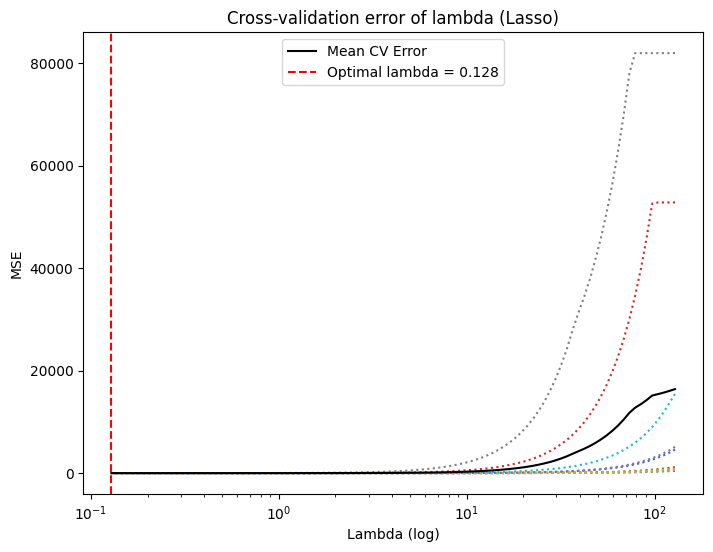

In [29]:

plt.figure(figsize=(8, 6))
plt.plot(lasso.alphas_, lasso.mse_path_, ':')
plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=-1), color='black', label='Mean CV Error')
plt.axvline(lasso.alpha_, linestyle='--', color='red', label=f'Optimal lambda = {lasso.alpha_:.3f}')
plt.xscale('log')
plt.xlabel('Lambda (log)')
plt.ylabel('MSE')
plt.title('Cross-validation error of lambda (Lasso)')
plt.legend()
plt.show()

